RFM, Cohort Analysis and Customer Segmentation 필사

Source : https://www.kaggle.com/vernon360961/rfm-cohort-analysis-and-customer-segmentation

# 데이터 불러오기 및 전처리

In [1]:
# 필요 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%autosave 0

Autosave disabled


In [2]:
df = pd.read_excel("http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx")
df.shape

(541909, 8)

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
# quantity, unitprice에 음수값 있는 것을 확인
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.describe(include = 'O')

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [3]:
# 컬럼별 결측치 비율 확인
# CustomerID가 없는 24%는 비회원 주문을 했을 것이라 생각해볼 수 있음
missing_percent = (df.isnull().mean()*100).to_frame()
missing_percent.columns = ['Percentage']
missing_percent.sort_values(by = "Percentage", ascending = False)

,Percentage
CustomerID,24.926694
Description,0.268311
InvoiceNo,0.000000
StockCode,0.000000
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
Country,0.000000


In [4]:
# CustomerID가 없는 값은 id_null 컬럼에 True : 1, False : 0으로체크
df['id_null'] = df['CustomerID'].isnull().astype(int)
df['id_null'].mean()

0.249266943342886

In [5]:
# 국가별 id_null 비율 구해서 null_by_country 변수에 담고 비율 높은 국가 10개 보기
null_by_country = df.groupby('Country')['id_null'].mean().to_frame()
null_by_country = null_by_country.rename(columns = {'id_null' : 'Percentage'})
null_by_country.sort_values('Percentage', ascending = False).head(10)*100

,Percentage
Country,
Hong Kong,100.000000
Unspecified,45.291480
United Kingdom,26.963861
Israel,15.824916
Bahrain,10.526316
EIRE,8.674963
Switzerland,6.243756
Portugal,2.567479
France,0.771298


<AxesSubplot:>

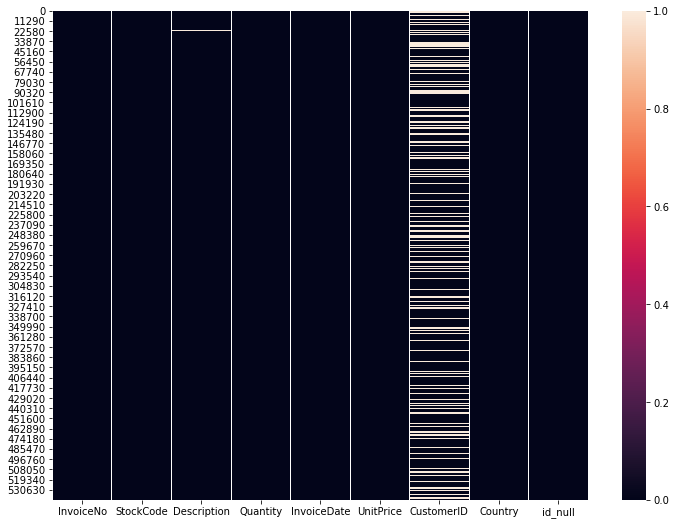

In [6]:
# 결측치 heatmap 시각화
plt.figure(figsize=(12,9))
sns.heatmap(df.isnull())

In [7]:
# CustomerID 누락된 데이터 제거
print(df.shape)
df = df.dropna(subset=['CustomerID'])
print(df.shape)

(541909, 9)
(406829, 9)


In [8]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
id_null        0
dtype: int64

In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID,id_null
count,406829.000000,406829.000000,406829.000000,406829.0
mean,12.061303,3.460471,15287.690570,0.0
std,248.693370,69.315162,1713.600303,0.0
min,-80995.000000,0.000000,12346.000000,0.0
25%,2.000000,1.250000,13953.000000,0.0
50%,5.000000,1.950000,15152.000000,0.0
75%,12.000000,3.750000,16791.000000,0.0
max,80995.000000,38970.000000,18287.000000,0.0


In [10]:
# Quantity 컬럼의 음수 데이터 확인
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,0
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,0
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,0
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,0
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,0
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,0
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,0
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,0


In [11]:
# 고객 중 한 명 데이터 확인해보기
# 구매 취소 데이터에 -가 붙어있는 것으로 보임
df[df['CustomerID']  == 14397]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null
182820,552575,22178,VICTORIAN GLASS HANGING T-LIGHT,24,2011-05-10 12:25:00,1.25,14397.0,United Kingdom,0
182821,552575,23144,ZINC T-LIGHT HOLDER STARS SMALL,12,2011-05-10 12:25:00,0.83,14397.0,United Kingdom,0
182822,552575,20846,ZINC HEART LATTICE T-LIGHT HOLDER,12,2011-05-10 12:25:00,1.25,14397.0,United Kingdom,0
182823,552575,82484,WOOD BLACK BOARD ANT WHITE FINISH,2,2011-05-10 12:25:00,7.95,14397.0,United Kingdom,0
182824,552575,84946,ANTIQUE SILVER T-LIGHT GLASS,12,2011-05-10 12:25:00,1.25,14397.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
533101,581011,22478,BIRDHOUSE GARDEN MARKER,20,2011-12-07 09:22:00,1.25,14397.0,United Kingdom,0
533102,581011,20846,ZINC HEART LATTICE T-LIGHT HOLDER,24,2011-12-07 09:22:00,1.25,14397.0,United Kingdom,0
533103,581011,22600,CHRISTMAS RETROSPOT STAR WOOD,12,2011-12-07 09:22:00,0.85,14397.0,United Kingdom,0
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom,0


In [12]:
# 이번 분석을 위해서는 Quantity, UnitPrice가 0보다 큰 값만 사용
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df.shape

(397884, 9)

In [13]:
# 중복값 제거
print(df.shape)
df = df.drop_duplicates().copy()
print(df.shape)

(397884, 9)
(392692, 9)


In [14]:
df.describe()

,Quantity,UnitPrice,CustomerID,id_null
count,392692.000000,392692.000000,392692.000000,392692.0
mean,13.119702,3.125914,15287.843865,0.0
std,180.492832,22.241836,1713.539549,0.0
min,1.000000,0.001000,12346.000000,0.0
25%,2.000000,1.250000,13955.000000,0.0
50%,6.000000,1.950000,15150.000000,0.0
75%,12.000000,3.750000,16791.000000,0.0
max,80995.000000,8142.750000,18287.000000,0.0


# EDA

In [15]:
# Quantity * UnitPrice 계산한 TotalCost 컬럼 생성
df['TotalCost'] = df['Quantity'] * df['UnitPrice']

In [16]:
df.describe()

,Quantity,UnitPrice,CustomerID,id_null,TotalCost
count,392692.000000,392692.000000,392692.000000,392692.0,392692.000000
mean,13.119702,3.125914,15287.843865,0.0,22.631500
std,180.492832,22.241836,1713.539549,0.0,311.099224
min,1.000000,0.001000,12346.000000,0.0,0.001000
25%,2.000000,1.250000,13955.000000,0.0,4.950000
50%,6.000000,1.950000,15150.000000,0.0,12.450000
75%,12.000000,3.750000,16791.000000,0.0,19.800000
max,80995.000000,8142.750000,18287.000000,0.0,168469.600000


In [17]:
# TotalCost의 평균 22, 최대값은 168469 -> 이상치로 판단
df['TotalCost'].describe()

count    392692.000000
mean         22.631500
std         311.099224
min           0.001000
25%           4.950000
50%          12.450000
75%          19.800000
max      168469.600000
Name: TotalCost, dtype: float64

<AxesSubplot:xlabel='TotalCost'>

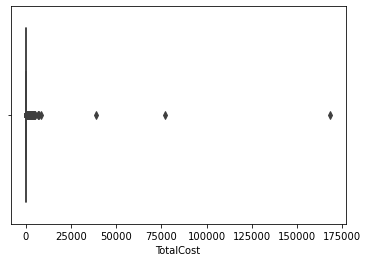

In [18]:
# 3개의 이상치 관측됨
sns.boxplot(df['TotalCost'])

In [19]:
# 총주문금액이 70000 넘어가는 이상치 데이터 확인
# 1회 주문에 대량 구매한 데이터로 코호트 분석시에는 제거해주는 것이 적합할 것으로 보임
df[df['TotalCost'] > 70000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null,TotalCost
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,0,77183.6
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,0,168469.6


In [20]:
df[df['CustomerID'].isin([12346.0, 16446.0])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null,TotalCost
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,0,77183.60
194354,553573,22980,PANTRY SCRUBBING BRUSH,1,2011-05-18 09:52:00,1.65,16446.0,United Kingdom,0,1.65
194355,553573,22982,PANTRY PASTRY BRUSH,1,2011-05-18 09:52:00,1.25,16446.0,United Kingdom,0,1.25
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,0,168469.60


In [21]:
# TotalCost 가 70000 보다 작은 값만 df에 담기
df = df[df['TotalCost'] < 70000].copy()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34


<AxesSubplot:xlabel='TotalCost'>

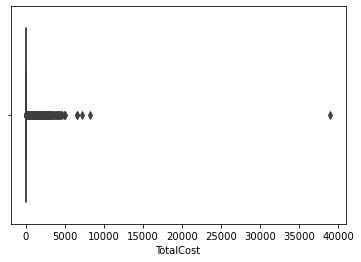

In [22]:
sns.boxplot(df['TotalCost'])

## Most purchased products

구매 수요를 추적하기 위해 가장 판매가 많았던 제품을 확인

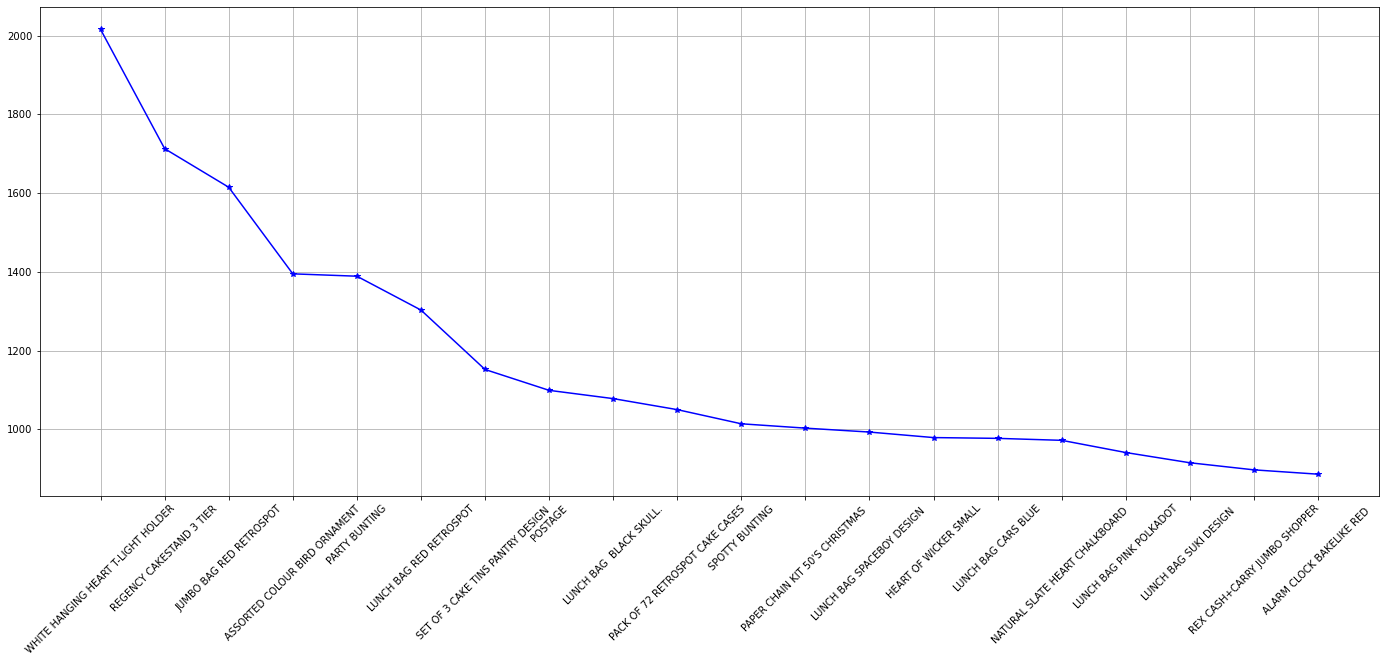

In [23]:
most_purchased_prods = pd.DataFrame(df['Description'].value_counts().head(20))
most_purchased_prods = most_purchased_prods.rename(columns = {'Description' : 'Count'})

plt.figure(figsize = (24, 9))
plt.xticks(rotation = 45)
plt.plot(most_purchased_prods, 'b*-')
plt.grid()

<AxesSubplot:>

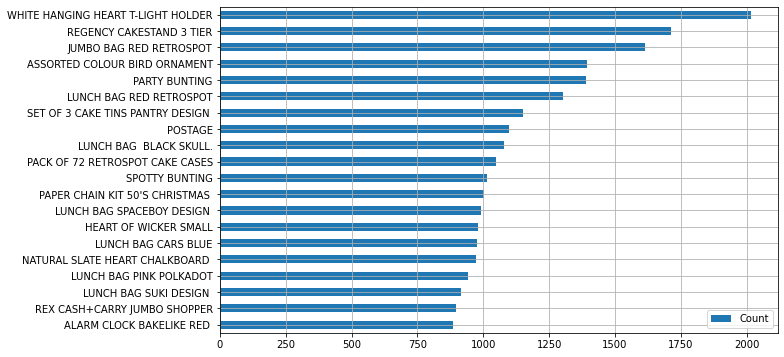

In [24]:
most_purchased_prods.sort_values('Count').plot.barh(figsize = (10, 6), grid = True)

## Country with the most purchases

나라별 판매량 확인

<AxesSubplot:>

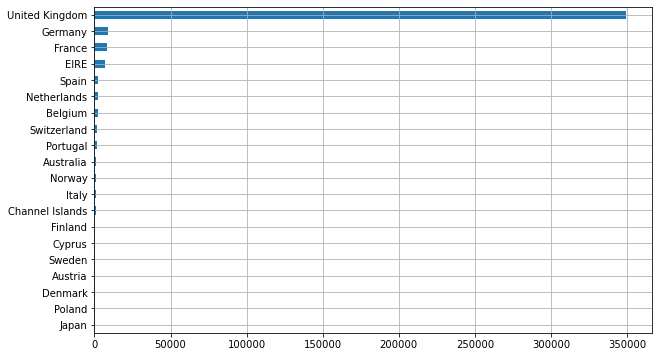

In [25]:
# 영국에서의 판매가 압도적으로 많은 것으로 확인
df['Country'].value_counts().head(20).sort_values().plot.barh(
    figsize = (10, 6), grid = True)

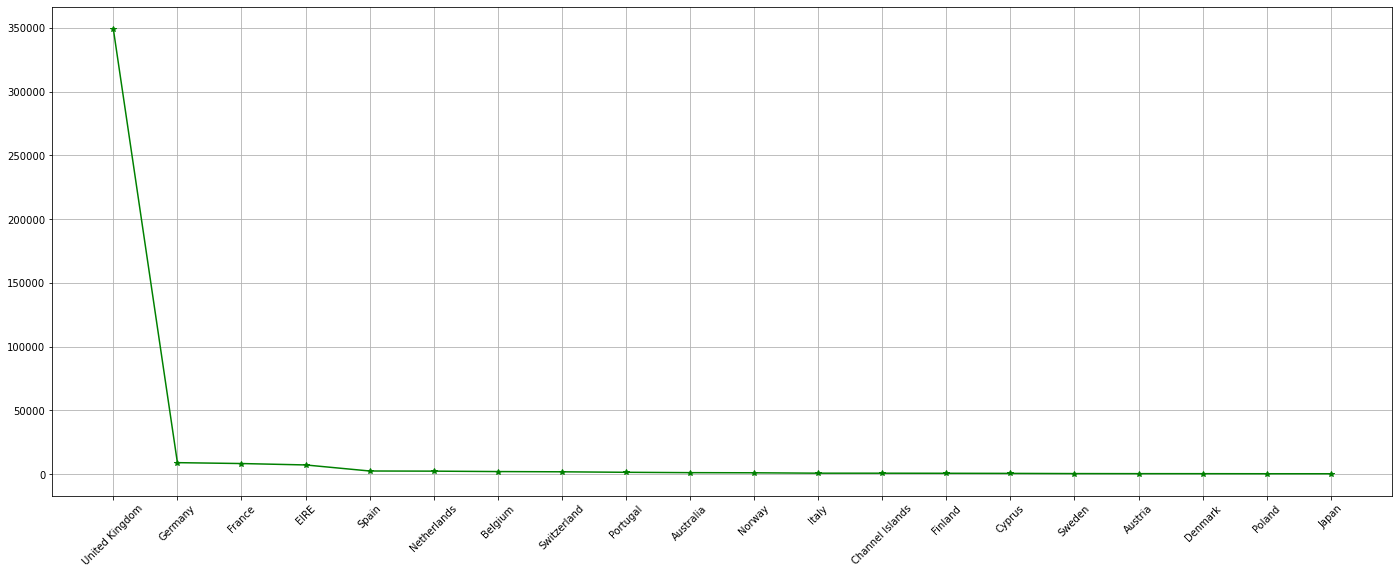

In [26]:
most_purchased_bycountry = pd.DataFrame(
    df['Country'].value_counts().head(20)).rename(columns={'Country':'Count'})

plt.figure(figsize=(24,9))
plt.xticks(rotation=45)
plt.plot(most_purchased_bycountry, 'g*-')
plt.grid()

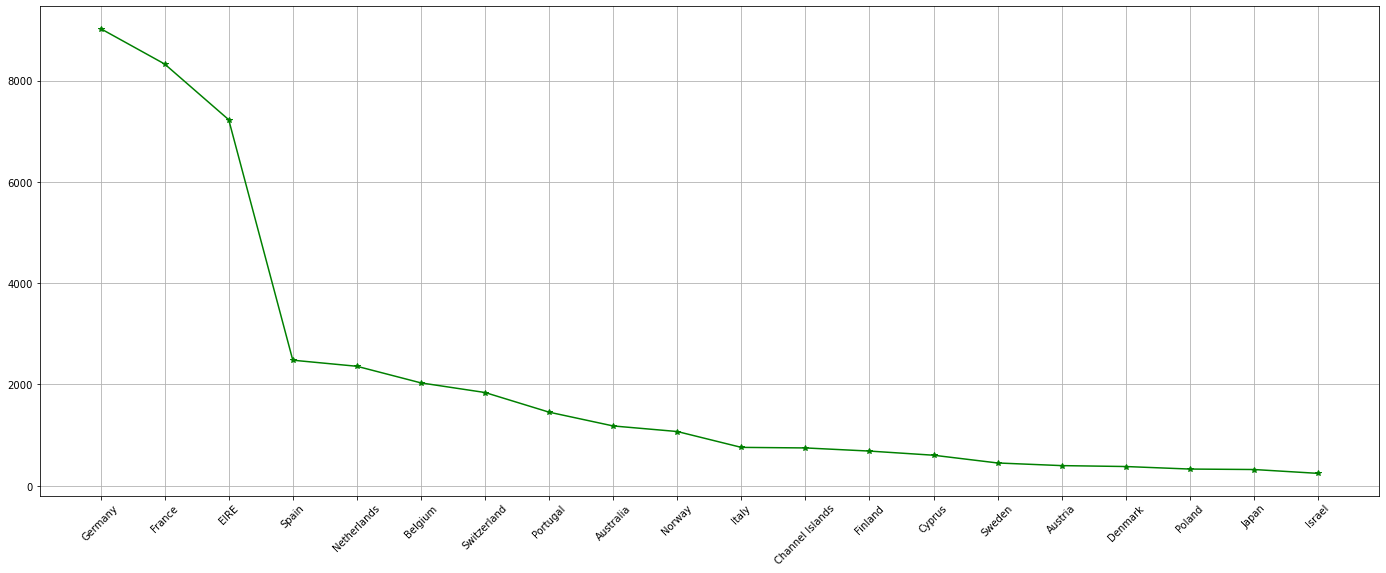

In [27]:
# 영국 외 국가 판매량을 보다 정확하게 확인하기 위해 영국을 제외한 데이터로 다시 시각화
# 독일, 프랑스, 아일랜드 등지의 판매량도 비교적 높은 것으로 나타남
nonuk_df = df[df['Country'] != 'United Kingdom']
most_purchased_bycountry_nonuk = pd.DataFrame(
    nonuk_df['Country'].value_counts().head(20)).rename(columns = {'Country' : 'Count'})

plt.figure(figsize=(24,9))
plt.xticks(rotation=45)
plt.plot(most_purchased_bycountry_nonuk, 'g*-')
plt.grid()

In [28]:
# is_null 컬럼은 사용 완료후 제거
del df['id_null']

## Cardinality of the dataset

In [29]:
# 각 컬럼별 count, unique값 확인
df.describe()

,Quantity,UnitPrice,CustomerID,TotalCost
count,392690.000000,392690.000000,392690.000000,392690.00000
mean,12.724521,3.125922,15287.848407,22.00605
std,43.083646,22.241892,1713.536485,96.77061
min,1.000000,0.001000,12347.000000,0.00100
25%,2.000000,1.250000,13955.000000,4.95000
50%,6.000000,1.950000,15150.000000,12.45000
75%,12.000000,3.750000,16791.000000,19.80000
max,4800.000000,8142.750000,18287.000000,38970.00000


In [30]:
df.describe(include = 'O')

,InvoiceNo,StockCode,Description,Country
count,392690,392690,392690,392690
unique,18530,3664,3876,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,542,2023,2016,349201


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392690 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392690 non-null  object        
 1   StockCode    392690 non-null  object        
 2   Description  392690 non-null  object        
 3   Quantity     392690 non-null  int64         
 4   InvoiceDate  392690 non-null  datetime64[ns]
 5   UnitPrice    392690 non-null  float64       
 6   CustomerID   392690 non-null  float64       
 7   Country      392690 non-null  object        
 8   TotalCost    392690 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.0+ MB


In [32]:
# InvoiceDate 열을 날짜, 시간 값으로 분리
df['InvoiceDateCon'] = df['InvoiceDate'].dt.date
df['InvoiceDateCon']

0         2010-12-01
1         2010-12-01
2         2010-12-01
3         2010-12-01
4         2010-12-01
             ...    
541904    2011-12-09
541905    2011-12-09
541906    2011-12-09
541907    2011-12-09
541908    2011-12-09
Name: InvoiceDateCon, Length: 392690, dtype: object

In [33]:
df['InvoiceDateCon'] = pd.to_datetime(df['InvoiceDateCon'])
df['InvoiceDateCon']

0        2010-12-01
1        2010-12-01
2        2010-12-01
3        2010-12-01
4        2010-12-01
            ...    
541904   2011-12-09
541905   2011-12-09
541906   2011-12-09
541907   2011-12-09
541908   2011-12-09
Name: InvoiceDateCon, Length: 392690, dtype: datetime64[ns]

## Cohort analysis

* 고객을 동일한 특성을 공유하는 그룹으로 구분하여 마케팅에 활용
* 코호트 유형 <br>
  1) 타임 코호트 : 가입한 시기, 구매한 시간 등 타임스탬프를 활용한 그룹화<br>
  2) 행동 코호트 : 구매한 제품, 가입한 서비스와 같은 이전 활동을 기준으로 그룹화<br>
  3) 규모 코호트 : 특정기간 소비한 금액 기준으로 그룹화

In [34]:
# 1년치 데이터. 월, 일, 분기단위 등 다양한 코호트 분석이 가능함
df['InvoiceDate'].describe()

count                  392690
unique                  17280
top       2011-11-14 15:27:00
freq                      542
first     2010-12-01 08:26:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

In [35]:
# datetime 라이브러리를 사용해서 InvoiceDate 컬럼 데이터를 월별로 구분
# 코호트 분석시 활용하기 위해 날짜는 모두 1일로 맞춰줌
def get_month(x): return dt.datetime(x.year, x.month, 1)
df['InvoiceDateCon'] = df['InvoiceDateCon'].apply(get_month)
df['InvoiceDateCon']

0        2010-12-01
1        2010-12-01
2        2010-12-01
3        2010-12-01
4        2010-12-01
            ...    
541904   2011-12-01
541905   2011-12-01
541906   2011-12-01
541907   2011-12-01
541908   2011-12-01
Name: InvoiceDateCon, Length: 392690, dtype: datetime64[ns]

In [36]:
# 같은 월에 가입한 고객군을 Cohort로 묶기 위해 CohortMonth 컬럼 생성
grouping = df.groupby('CustomerID')['InvoiceDateCon']
df['CohortMonth'] = grouping.transform('min')

In [37]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost,InvoiceDateCon,CohortMonth
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-01,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-01,2011-08-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011-12-01,2011-08-01


In [38]:
# 고객이 처음 구매한지 몇 개월이 지났는지 계산하기 위해 datetime타입 컬럼에서 연도, 월 값을 리턴해주는 함수 만들기
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

In [39]:
# InvoiceDateCon과 CohortMonth 컬럼의 연도, 월을 각각 불러오기
invoice_year, invoice_month = get_date_int(df, 'InvoiceDateCon')
cohort_year, cohort_month = get_date_int(df, 'CohortMonth')

In [40]:
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

# 연도에는 12를 곱해주고 월에는 1을 더하여 CohortIndex에 저장
# 첫 구매월로부터 몇개월이 지났는지 보여주는 컬럼
df['CohortIndex'] = (years_diff * 12) + (months_diff + 1)
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost,InvoiceDateCon,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1


<AxesSubplot:xlabel='CohortIndex', ylabel='count'>

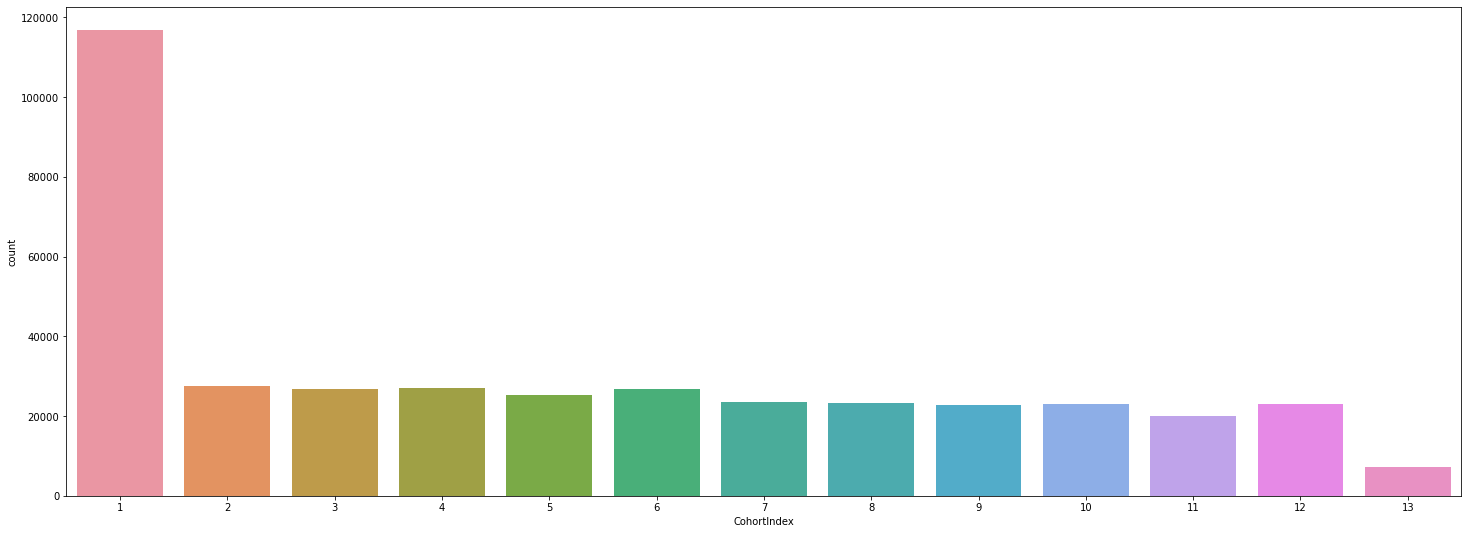

In [41]:
# 고객이 구매한지 몇 개월이 지났는지에 대한 인덱스 (잔존율 분석, 코호트 분석)
plt.figure(figsize = (25, 9))
sns.countplot(x = 'CohortIndex', data = df)

In [42]:
# 같은 방식으로 시간에 대해서도 코호트 그룹 만들기
df['TimeOfPurchase'] = df['InvoiceDate'].dt.time
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost,InvoiceDateCon,CohortMonth,CohortIndex,TimeOfPurchase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01,1,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1,08:26:00


<AxesSubplot:xlabel='TimeOfPurchase'>

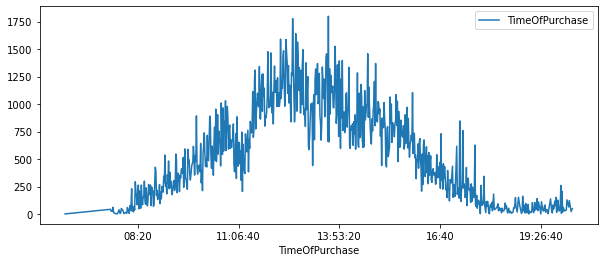

In [43]:
# 시간대별 구매건수 시각화
# 점심시간의 구매건수가 가장 많은 것으로 확인됨
# 이 시간에 마케팅 커뮤니케이션을 하는 것이 효율적일 수 있음
df.groupby(['TimeOfPurchase']).agg({"TimeOfPurchase" : "count"}).plot(figsize = (10,4))

In [73]:
# 데이터를 CohortMonth, CohortIndex로 그룹화 한 후 월별 해당 코호트의 고객수 계산
grouping = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_counts = grouping['CustomerID'].nunique().unstack()
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,416.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,26.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
# 가입 첫번째 달 기준으로 개월수가 지나면서 몇% 고객이 남아있는지 확인 
# 이벤트 여부 등에 따라 각 코호트 재방문율은 매달 달라지게 됨
retention_round = (cohort_counts.div(cohort_counts[1], axis = 0) * 100).round(1)
retention_round

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01-01,100.0,22.1,26.7,23.1,32.2,28.8,24.8,24.3,30.0,32.7,36.5,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.2,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='CohortIndex', ylabel='CohortMonth'>

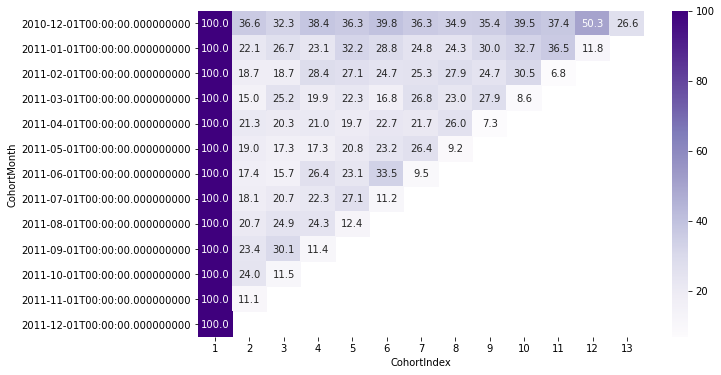

In [80]:
# heatmap으로 retention_round 시각화
plt.figure(figsize = (10, 6))
sns.heatmap(retention_round, annot = True, fmt = '.1f', cmap = "Purples")

# Feature Engineering

In [84]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost,InvoiceDateCon,CohortMonth,CohortIndex,TimeOfPurchase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,2010-12-01,2010-12-01,1,08:26:00


In [88]:
last_timestamp = df['InvoiceDate'].max() + dt.timedelta(days = 1)
last_timestamp

Timestamp('2011-12-10 12:50:00')

## RFM (Recency, Frequency, Monetary)

In [89]:
# RFM 정보를 담은 컬럼 생성
rfm = df.groupby(['CustomerID']).agg({'InvoiceDate' : lambda x : (last_timestamp - x.max()).days,
                                      'InvoiceNo' : 'count',
                                      'TotalCost' : 'sum'})
rfm

,InvoiceDate,InvoiceNo,TotalCost
CustomerID,,,
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
12352.0,36,85,2506.04
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [90]:
# 각 컬럼의 이름을 Recency, Frequency, MonetaryValue 로 변경
rfm.rename(columns = {"InvoiceDate" : "Recency", 
                    "InvoiceNo" : "Frequency", 
                    "TotalCost" : "MonetaryValue"}
           ,inplace = True)

In [91]:
rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
12352.0,36,85,2506.04


In [92]:
rfm.describe()

,Recency,Frequency,MonetaryValue
count,4337.000000,4337.000000,4337.000000
mean,92.529859,90.544155,1992.519182
std,99.968030,225.528962,8547.583474
min,1.000000,1.000000,2.900000
25%,18.000000,17.000000,306.450000
50%,51.000000,41.000000,668.430000
75%,142.000000,98.000000,1657.280000
max,374.000000,7676.000000,280206.020000


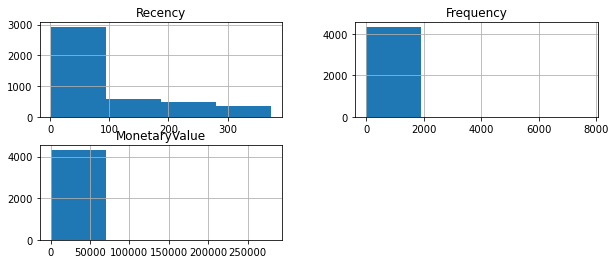

In [94]:
h = rfm.hist(figsize = (10, 4), bins = 4)

In [103]:
# 본 분석에서는 RFM 데이터를 4개 quantile로 나눔 (기준은 달라질 수 있음)
# Recency는 최근 구매에 더 많은 점수 부여
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)
list(r_labels), list(f_labels), list(m_labels)

([4, 3, 2, 1], [1, 2, 3, 4], [1, 2, 3, 4])

In [98]:
# qcut을 사용해 R, F, M 세그먼트를 q=4로 나누고 (25%씩) 위의 labels 적용
r_quartiles = pd.qcut(rfm['Recency'], q = 4, labels = r_labels)
f_quartiles = pd.qcut(rfm['Frequency'], q = 4, labels = f_labels)
m_quartiles = pd.qcut(rfm['MonetaryValue'], q = 4, labels = m_labels)

In [107]:
# assign으로 RFM 데이터프레임에 구한 값 넣어주기
rfm = rfm.assign(R = r_quartiles, F = f_quartiles, M = m_quartiles)
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12347.0,2,182,4310.00,4,4,4,4.04.04.0,12
12348.0,75,31,1797.24,2,2,4,2.02.04.0,8
12349.0,19,73,1757.55,3,3,4,3.03.04.0,10
12350.0,310,17,334.40,1,1,2,1.01.02.0,4
12352.0,36,85,2506.04,3,3,4,3.03.04.0,10


In [100]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4337 entries, 12347.0 to 18287.0
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Recency        4337 non-null   int64   
 1   Frequency      4337 non-null   int64   
 2   MonetaryValue  4337 non-null   float64 
 3   R              4337 non-null   category
 4   F              4337 non-null   category
 5   M              4337 non-null   category
dtypes: category(3), float64(1), int64(2)
memory usage: 148.6 KB


In [108]:
# RFM_Segment와 RFM_Score 구하기
def add_rfm(x) : return (str(x['R']) + str(x['F']) + str(x['M']))
rfm['RFM_Segment'] = rfm.apply(add_rfm, axis = 1)
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis = 1)
rfm.tail()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
18280.0,278,10,180.60,1,1,1,111,3
18281.0,181,7,80.82,1,1,1,111,3
18282.0,8,12,178.05,4,1,1,411,6
18283.0,4,721,2045.53,4,4,4,444,12
18287.0,43,70,1837.28,3,3,4,334,10


In [109]:
# RFM_Score 기준으로 그룹화하여 Recency, Frequency, MonetaryValue 컬럼의 평균값 확인
rfm.groupby('RFM_Score').agg({'Recency' : 'mean',
                             'Frequency' : 'mean',
                             'MonetaryValue' : 'mean'}).round(1)

,Recency,Frequency,MonetaryValue
RFM_Score,,,
3,260.6,8.2,157.0
4,177.2,13.6,240.0
5,152.9,21.2,366.6
6,95.6,28.0,651.9
7,79.6,37.9,759.3
8,64.0,55.9,986.6
9,46.1,78.9,1391.5
10,32.4,110.5,2056.4
11,21.3,186.9,4062.0


In [110]:
# median 값 보기 (min, max 값으로 인한 편향 제거)
rfm.groupby('RFM_Score').agg({"Recency" : np.median,
                             "Frequency" : "median",
                             "MonetaryValue" : "median"
                             }).round(1)

,Recency,Frequency,MonetaryValue
RFM_Score,,,
3,261.0,8.0,153.4
4,157.5,12.0,226.3
5,147.5,19.0,333.7
6,71.0,25.0,409.2
7,54.5,33.0,616.6
8,52.0,49.0,797.7
9,30.0,69.0,1093.7
10,23.0,93.0,1469.9
11,22.0,148.0,2474.2


In [111]:
# RFM_Score에 따른 Top, Middle, Low 등급 구분
def segments(df):
    if df['RFM_Score'] > 9:
        return 'Top'
    elif (df['RFM_Score'] > 5) and (df['RFM_Score'] <= 9):
        return 'Middle'
    else : 
        return 'Low'

In [112]:
# General_Segment 컬럼에 정보 추가
rfm['General_Segment'] = rfm.apply(segments, axis = 1)
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment
CustomerID,,,,,,,,,
12347.0,2,182,4310.00,4,4,4,444,12,Top
12348.0,75,31,1797.24,2,2,4,224,8,Middle
12349.0,19,73,1757.55,3,3,4,334,10,Top
12350.0,310,17,334.40,1,1,2,112,4,Low
12352.0,36,85,2506.04,3,3,4,334,10,Top
...,...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111,3,Low
18281.0,181,7,80.82,1,1,1,111,3,Low
18282.0,8,12,178.05,4,1,1,411,6,Middle


In [113]:
# General_Segment 기준으로 그룹화하여 Recency, Frequency 평균, MonetaryValue의 평균 및 count 구하기
rfm.groupby('General_Segment').agg({"Recency" : "mean",
                                    "Frequency" : "mean",
                                    "MonetaryValue" : ["mean", "count"]
                                   }).round(1)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Low               192.2      15.1         266.3  1288
Middle             71.9      49.5         936.1  1786
Top                20.1     225.6        5246.8  1263

## K-Means Clustering

In [114]:
# Clustering 작업을 위해 필요 정보만 별도 데이터프레임으로 만들기
rfm_cluster = rfm.iloc[:,0:3]
rfm_cluster

,Recency,Frequency,MonetaryValue
CustomerID,,,
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
12352.0,36,85,2506.04
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [115]:
rfm_cluster.describe()

,Recency,Frequency,MonetaryValue
count,4337.000000,4337.000000,4337.000000
mean,92.529859,90.544155,1992.519182
std,99.968030,225.528962,8547.583474
min,1.000000,1.000000,2.900000
25%,18.000000,17.000000,306.450000
50%,51.000000,41.000000,668.430000
75%,142.000000,98.000000,1657.280000
max,374.000000,7676.000000,280206.020000


<AxesSubplot:xlabel='MonetaryValue', ylabel='Density'>

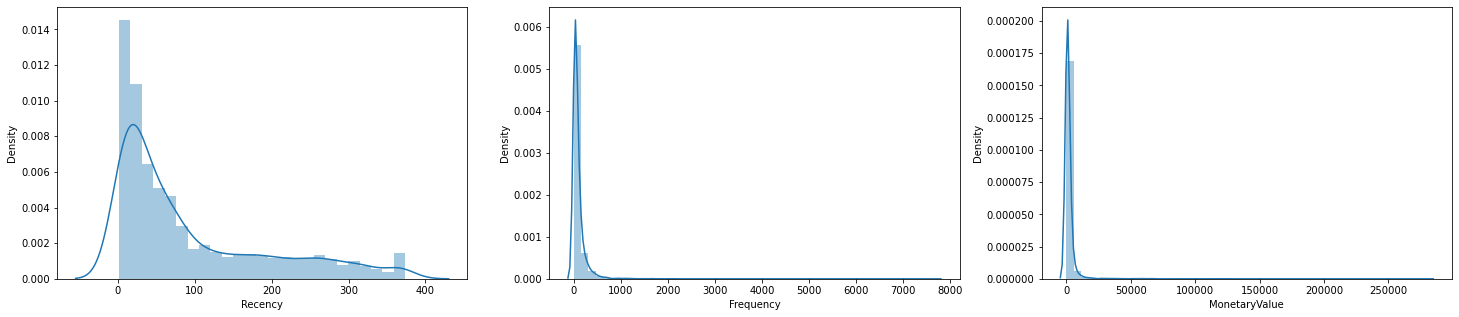

In [116]:
f,ax = plt.subplots(figsize=(25, 5))
plt.subplot(1, 3, 1); sns.distplot(rfm_cluster['Recency'])
plt.subplot(1, 3, 2); sns.distplot(rfm_cluster['Frequency'])
plt.subplot(1, 3, 3); sns.distplot(rfm_cluster['MonetaryValue'])

In [117]:
# 데이터가 한쪽으로 치우쳐 있으므로 clustering 진행전 정규화 진행
rfm_cluster_log = np.log(rfm_cluster)
rfm_cluster_log.describe()

,Recency,Frequency,MonetaryValue
count,4337.000000,4337.000000,4337.000000
mean,3.768297,3.672275,6.582099
std,1.431335,1.320026,1.259983
min,0.000000,0.000000,1.064711
25%,2.890372,2.833213,5.725055
50%,3.931826,3.713572,6.504932
75%,4.955827,4.584967,7.412933
max,5.924256,8.945854,12.543280


<AxesSubplot:xlabel='MonetaryValue', ylabel='Density'>

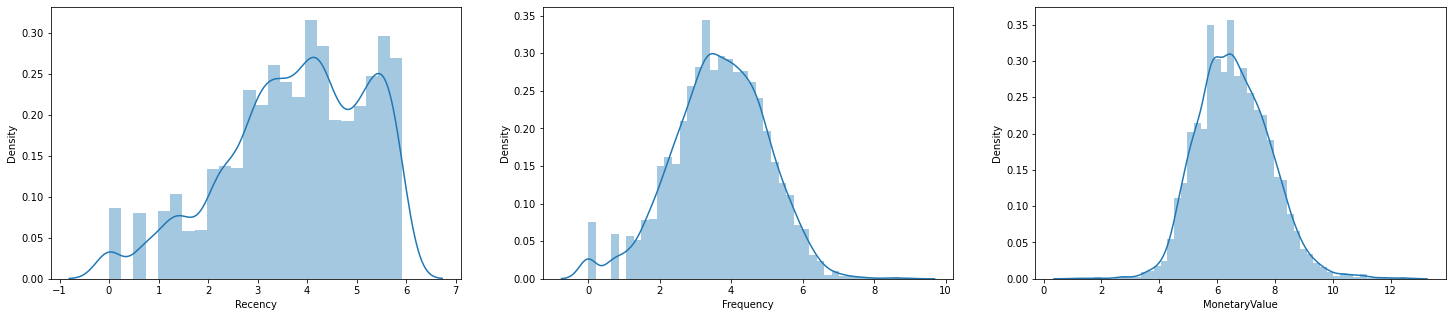

In [118]:
f,ax = plt.subplots(figsize=(25, 5))
plt.subplot(1, 3, 1); sns.distplot(rfm_cluster_log['Recency'])
plt.subplot(1, 3, 2); sns.distplot(rfm_cluster_log['Frequency'])
plt.subplot(1, 3, 3); sns.distplot(rfm_cluster_log['MonetaryValue'])

In [119]:
# StandardScaler로 표준화 진행
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [120]:
scaler.fit(rfm_cluster_log)
rfm_norm = scaler.fit_transform(rfm_cluster_log)
rfm_norm = pd.DataFrame(data=rfm_norm, 
                        index=rfm_cluster_log.index,
                        columns=rfm_cluster_log.columns)
rfm_norm.describe()

,Recency,Frequency,MonetaryValue
count,4.337000e+03,4.337000e+03,4.337000e+03
mean,-4.101059e-17,-2.413718e-16,3.427689e-17
std,1.000115e+00,1.000115e+00,1.000115e+00
min,-2.633019e+00,-2.782293e+00,-4.379444e+00
25%,-6.134317e-01,-6.357138e-01,-6.802814e-01
50%,1.142625e-01,3.128845e-02,-6.125147e-02
75%,8.297622e-01,6.914997e-01,6.594775e-01
max,1.506432e+00,3.995518e+00,4.731707e+00


In [125]:
# cluster 수 1~19개일 때 k-means clustering elbow값 확인하기
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(rfm_norm)
    wcss.append(kmeans.inertia_)

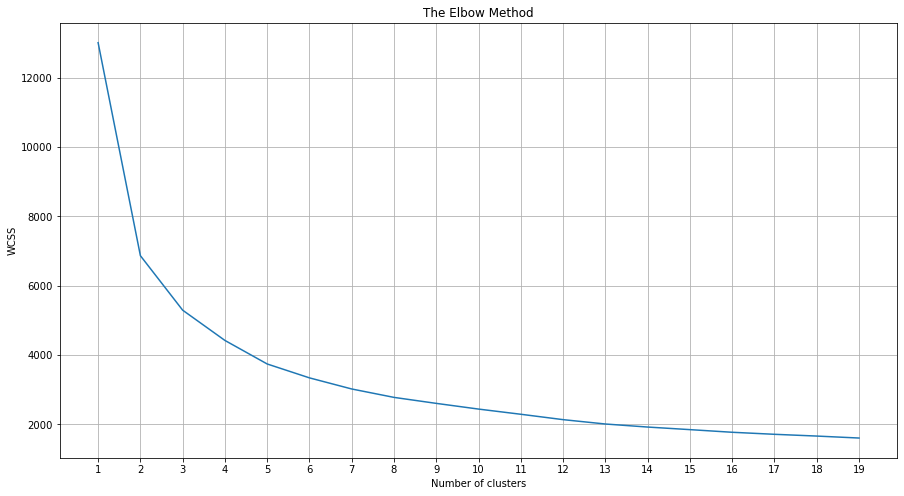

In [127]:
plt.figure(figsize=(15,8))
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 20))
plt.grid(True)
plt.show()

In [128]:
# n_cluster = 5를 기준으로 진행
kmeans = KMeans(n_clusters=5, random_state = 42)
kmeans.fit(rfm_norm)
kmeans.cluster_centers_

array([[-0.83983137, -0.14705635, -0.27916181],
       [ 0.72641969, -1.47870343, -1.2454008 ],
       [ 0.04667598,  0.68201582,  0.65584646],
       [ 0.80684601, -0.29637922, -0.38789644],
       [-1.42381825,  1.31064418,  1.42822078]])

In [132]:
# 라벨링 된 결과 확인
rfm['Cluster'] = kmeans.labels_

In [133]:
# General_Segment 컬럼(quartile로 나눈 방식), Cluster 컬럼(k-means로 나눈 방식) 비교
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment,Cluster
CustomerID,,,,,,,,,,
12347.0,2,182,4310.00,4,4,4,444,12,Top,4
12348.0,75,31,1797.24,2,2,4,224,8,Middle,2
12349.0,19,73,1757.55,3,3,4,334,10,Top,2
12350.0,310,17,334.40,1,1,2,112,4,Low,3
12352.0,36,85,2506.04,3,3,4,334,10,Top,2
...,...,...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111,3,Low,1
18281.0,181,7,80.82,1,1,1,111,3,Low,1
18282.0,8,12,178.05,4,1,1,411,6,Middle,0


In [134]:
# General_Segment 기준으로 그룹화하여 Recency, Frequency 평균, MonetaryValue의 평균 및 count 구하기
rfm.groupby(["Cluster"]).agg({"Recency" : "mean",
                              "Frequency" : "mean",
                              "MonetaryValue" : ["mean", "count"],
                             }).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          17.0      41.0         636.0   767
1         169.0       7.0         198.0   705
2          60.0     114.0        2029.0  1020
3         166.0      31.0         525.0  1213
4           9.0     321.0        8397.0   632

In [139]:
# Recency, Frequency, MonetaryValue 컬럼별 그룹 평균값과 전체 데이터 평균값 비교
mean_clus = rfm.groupby(['Cluster']).mean()
pop_avg = rfm.mean()
relative_imp = mean_clus / pop_avg - 1
relative_imp = relative_imp.dropna(axis=1).iloc[:,[3,0,1]]

In [140]:
relative_imp

,Recency,Frequency,MonetaryValue
Cluster,,,
0,-0.812753,-0.550768,-0.680754
1,0.828231,-0.921389,-0.900572
2,-0.346623,0.254604,0.018312
3,0.796385,-0.658281,-0.736266
4,-0.906616,2.548762,3.214326


<AxesSubplot:ylabel='Cluster'>

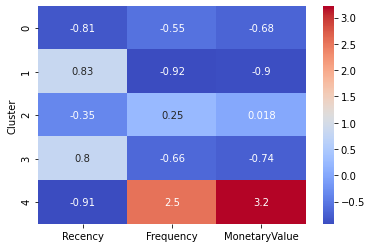

In [141]:
# heatmap 시각화
sns.heatmap(relative_imp, annot = True, cmap = "coolwarm")